In [140]:
import pandas as pd
import numpy as np
import csv

In [122]:
data =[]
data.append(['Algo', 'Sensitivity', 'Specificity', 'Accuracy', 'FDR', 'MCC'])

# CLINVAR table


In [123]:
# NP_000426.2 
# P46531
import re
posn = []
ref = []
chg = []
clinvar = pd.read_table('notch3_pat_ben.txt')
clinvar['Protein_id'] = 'NP_000426.2'
#df['Position'] = re.search(r'\d+', str(df['Protein change'])).group()
for pos in clinvar['Protein change']:
    posn.append(re.search(r'\d+', str(pos)).group())
    ref.append(re.search(r'^[A-Z]', str(pos)).group())
    chg.append(re.search(r'[A-Z]$', str(pos)).group())
clinvar['Position'] = posn
clinvar['Ref'] = ref
clinvar['Variant'] = chg
clinvar.head()

# Export for provean batch 
clin2 = clinvar[['Protein_id', 'Position','Ref','Variant']]
clin2.to_csv('notch3_table', sep = ' ', header = False, index = False)

#clin2['Effect'] 
#clinvar['Effect']
eff = []
for ef in clinvar['Clinical significance (Last reviewed)']:
    a = (re.search(r'Benign|benign|Pathogenic|pathogenic', ef).group())
    eff.append(a)
clin2['Effect'] = eff
clin2


/tmp/ipykernel_22377/882211693.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clin2['Effect'] = eff


,Protein_id,Position,Ref,Variant,Effect
0,NP_000426.2,2270,T,M,Benign
1,NP_000426.2,2223,A,V,Benign
2,NP_000426.2,2190,A,V,Benign
3,NP_000426.2,2074,P,L,Benign
4,NP_000426.2,2011,V,I,Benign
...,...,...,...,...,...
161,NP_000426.2,49,C,Y,Pathogenic
162,NP_000426.2,49,C,F,Pathogenic
163,NP_000426.2,49,C,G,Pathogenic
164,NP_000426.2,49,C,R,Pathogenic


# POLYPHEN table


In [124]:
pph = pd.read_table('batch_results/notch3_polyphen.txt')
pph.head()

## Make normal names
names = pph.columns
new_names = []
for name in names:
    new_names.append(re.search(r'(\w+(-\w+)?)', name).group(0))
pph.columns = new_names

## Make normal pph2_class

res = list(pph['pph2_class'])
new_res = []
for r in res:
    new_res.append(re.search(r'[a-z]*$', r).group())
pph['pph2_class'] = new_res

#print(re.search(r'[a-z]*$', res[0]).group())

### New df with selected cols
pph2 = pph[['pos', 'aa1', 'aa2', 'prediction', 'pph2_class', 'pph2_FPR', 'pph2_TPR', 'pph2_FDR']]
pph2['Res'] = ['-' for i in range(166)]


/tmp/ipykernel_22377/738485173.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pph2['Res'] = ['-' for i in range(166)]


In [125]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(166):
    if pph2['pph2_class'][i] == 'deleterious' and clin2['Effect'][i] == 'Pathogenic':
        TP +=1
        pph2['Res'][i] = 'TP'
    if pph2['pph2_class'][i] == 'deleterious' and clin2['Effect'][i] == 'Benign':
        FP +=1
        pph2['Res'][i] = 'FP'
    if pph2['pph2_class'][i] == 'neutral' and clin2['Effect'][i] == 'Benign':
        TN +=1
        pph2['Res'][i] = 'TN' 
    if pph2['pph2_class'][i] == 'neutral' and clin2['Effect'][i] == 'Pathogenic':
        FN +=1
        pph2['Res'][i] = 'FN'
print(TP, TN, FP, FN)
pph2


/tmp/ipykernel_22377/2228692600.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pph2['Res'][i] = 'FP'
/tmp/ipykernel_22377/2228692600.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pph2['Res'][i] = 'TN'
/tmp/ipykernel_22377/2228692600.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pph2['Res'][i] = 'TP'


129 19 18 0


,pos,aa1,aa2,prediction,pph2_class,pph2_FPR,pph2_TPR,pph2_FDR,Res
0,2270,T,M,probably damaging,deleterious,0.00026,0.00018,0.0109,FP
1,2223,A,V,benign,neutral,0.85200,0.99400,0.5140,TN
2,2190,A,V,benign,neutral,0.11800,0.91100,0.1500,TN
3,2074,P,L,benign,neutral,0.16500,0.94100,0.1920,TN
4,2011,V,I,benign,neutral,0.14000,0.92500,0.1700,TN
...,...,...,...,...,...,...,...,...,...
161,49,C,Y,probably damaging,deleterious,0.00026,0.00018,0.0109,TP
162,49,C,F,probably damaging,deleterious,0.00026,0.00018,0.0109,TP
163,49,C,G,probably damaging,deleterious,0.00026,0.00018,0.0109,TP
164,49,C,R,probably damaging,deleterious,0.00026,0.00018,0.0109,TP


In [126]:
Sens = TP/(TP+FN)
Spec = TN/(TN+FP)
Acc = (TP+TN)/(TP+TN+FP+FN)
FDR = 1 - (TP/(TP+FP))
MCC =((TP*TN)-(FP*FN))/((TP+FP)*(TP+FN)*(TN+FN)*(TN+FP))**0.5


print('Sens =', TP/(TP+FN))
print('Spec =', TN/(TN+FP))
print('Acc =', (TP+TN)/(TP+TN+FP+FN))
print('FDR =', 1 - (TP/(TP+FP)))
print('MCC =', ((TP*TN)-(FP*FN))/((TP+FP)*(TP+FN)*(TN+FN)*(TN+FP))**0.5)




data.append(['Polyphen',Sens,Spec,Acc,FDR,MCC])

Sens = 1.0
Spec = 0.5135135135135135
Acc = 0.891566265060241
FDR = 0.12244897959183676
MCC = 0.6712930118637948


# PROVEAN table

In [127]:
provean = pd.read_table('batch_results/notch3_provean.tsv')
provean
prov2 = provean[['POSITION','RESIDUE_REF','RESIDUE_ALT','PREDICTION (cutoff=-2.5)', 'PREDICTION (cutoff=0.05)']]
prov2['Res'] = ['-' for i in range(166)]
names = ['pos', 'ref', 'alt', 'pred-2.5', 'pred0.05', 'Res']
prov2.columns = names
prov2

/tmp/ipykernel_22377/796921254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prov2['Res'] = ['-' for i in range(166)]


,pos,ref,alt,pred-2.5,pred0.05,Res
0,2270,T,M,Neutral,Tolerated,-
1,2223,A,V,Neutral,Tolerated,-
2,2190,A,V,Neutral,Tolerated,-
3,2074,P,L,Neutral,Tolerated,-
4,2011,V,I,Neutral,Tolerated,-
...,...,...,...,...,...,...
161,49,C,Y,Deleterious,Damaging,-
162,49,C,F,Deleterious,Damaging,-
163,49,C,G,Deleterious,Damaging,-
164,49,C,R,Deleterious,Damaging,-


Cutoff -2.5


In [128]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(166):
    if prov2['pred-2.5'][i] == 'Deleterious' and clin2['Effect'][i] == 'Pathogenic':
        TP +=1
        prov2['Res'][i] = 'TP'
    if prov2['pred-2.5'][i] == 'Deleterious' and clin2['Effect'][i] == 'Benign':
        FP +=1
        prov2['Res'][i] = 'FP'
    if prov2['pred-2.5'][i] == 'Neutral' and clin2['Effect'][i] == 'Benign':
        TN +=1
        prov2['Res'][i] = 'TN' 
    if prov2['pred-2.5'][i] == 'Neutral' and clin2['Effect'][i] == 'Pathogenic':
        FN +=1
        prov2['Res'][i] = 'FN'
print(TP, TN, FP, FN)
prov2


/tmp/ipykernel_22377/1686140592.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prov2['Res'][i] = 'TN'
/tmp/ipykernel_22377/1686140592.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prov2['Res'][i] = 'FP'
/tmp/ipykernel_22377/1686140592.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prov2['Res'][i] = 'TP'
/tmp/ipykernel_22377/1686140592.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

120 23 14 9


,pos,ref,alt,pred-2.5,pred0.05,Res
0,2270,T,M,Neutral,Tolerated,TN
1,2223,A,V,Neutral,Tolerated,TN
2,2190,A,V,Neutral,Tolerated,TN
3,2074,P,L,Neutral,Tolerated,TN
4,2011,V,I,Neutral,Tolerated,TN
...,...,...,...,...,...,...
161,49,C,Y,Deleterious,Damaging,TP
162,49,C,F,Deleterious,Damaging,TP
163,49,C,G,Deleterious,Damaging,TP
164,49,C,R,Deleterious,Damaging,TP


In [129]:
Sens =TP/(TP+FN)
Spec =TN/(TN+FP)
Acc =(TP+TN)/(TP+TN+FP+FN)
FDR =1 - (TP/(TP+FP))
MCC =((TP*TN)-(FP*FN))/((TP+FP)*(TP+FN)*(TN+FN)*(TN+FP))**0.5



print('Sens =', TP/(TP+FN))
print('Spec =', TN/(TN+FP))
print('Acc =', (TP+TN)/(TP+TN+FP+FN))
print('FDR =', 1 - (TP/(TP+FP)))
print('MCC =', ((TP*TN)-(FP*FN))/((TP+FP)*(TP+FN)*(TN+FN)*(TN+FP))**0.5)

data.append(['Provean_cut-2.5', Sens,Spec,Acc,FDR,MCC])

Sens = 0.9302325581395349
Spec = 0.6216216216216216
Acc = 0.8614457831325302
FDR = 0.10447761194029848
MCC = 0.5822274339659832


Cutoff 0.05

In [130]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(166):
    if prov2['pred0.05'][i] == 'Damaging' and clin2['Effect'][i] == 'Pathogenic':
        TP +=1
        prov2['Res'][i] = 'TP'
    if prov2['pred0.05'][i] == 'Damaging' and clin2['Effect'][i] == 'Benign':
        FP +=1
        prov2['Res'][i] = 'FP'
    if prov2['pred0.05'][i] == 'Tolerated' and clin2['Effect'][i] == 'Benign':
        TN +=1
        prov2['Res'][i] = 'TN' 
    if prov2['pred0.05'][i] == 'Tolerated' and clin2['Effect'][i] == 'Pathogenic':
        FN +=1
        prov2['Res'][i] = 'FN'
print(TP, TN, FP, FN)
prov2


/tmp/ipykernel_22377/1073022675.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prov2['Res'][i] = 'TN'
/tmp/ipykernel_22377/1073022675.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prov2['Res'][i] = 'FP'
/tmp/ipykernel_22377/1073022675.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prov2['Res'][i] = 'TP'
/tmp/ipykernel_22377/1073022675.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

118 22 15 11


,pos,ref,alt,pred-2.5,pred0.05,Res
0,2270,T,M,Neutral,Tolerated,TN
1,2223,A,V,Neutral,Tolerated,TN
2,2190,A,V,Neutral,Tolerated,TN
3,2074,P,L,Neutral,Tolerated,TN
4,2011,V,I,Neutral,Tolerated,TN
...,...,...,...,...,...,...
161,49,C,Y,Deleterious,Damaging,TP
162,49,C,F,Deleterious,Damaging,TP
163,49,C,G,Deleterious,Damaging,TP
164,49,C,R,Deleterious,Damaging,TP


In [131]:
Sens =TP/(TP+FN)
Spec = TN/(TN+FP)
Acc = (TP+TN)/(TP+TN+FP+FN)
FDR = 1 - (TP/(TP+FP))
MCC =((TP*TN)-(FP*FN))/((TP+FP)*(TP+FN)*(TN+FN)*(TN+FP))**0.5

print('Sens =', TP/(TP+FN))
print('Spec =', TN/(TN+FP))
print('Acc =', (TP+TN)/(TP+TN+FP+FN))
print('FDR =', 1 - (TP/(TP+FP)))
print('MCC =', ((TP*TN)-(FP*FN))/((TP+FP)*(TP+FN)*(TN+FN)*(TN+FP))**0.5)


data.append(['Provean_cut0.05', Sens,Spec,Acc,FDR,MCC])

Sens = 0.9147286821705426
Spec = 0.5945945945945946
Acc = 0.8433734939759037
FDR = 0.1127819548872181
MCC = 0.5311368715817255


# Straightforward table

In [132]:
stf = pd.read_csv('~/Documents/study/project2022_notch/clinvar_predictions.csv')
stf['Res'] = ['-' for i in range(166)]

TP = 0
TN = 0
FP = 0
FN = 0
for i in range(166):
    if stf['Prediction'][i] == 'Damaging' and clin2['Effect'][i] == 'Pathogenic':
        TP +=1
        stf['Res'][i] = 'TP'
    if stf['Prediction'][i] == 'Damaging' and clin2['Effect'][i] == 'Benign':
        FP +=1
        stf['Res'][i] = 'FP'
    if stf['Prediction'][i] == 'Benign' and clin2['Effect'][i] == 'Benign':
        TN +=1
        stf['Res'][i] = 'TN' 
    if stf['Prediction'][i] == 'Benign' and clin2['Effect'][i] == 'Pathogenic':
        FN +=1
        stf['Res'][i] = 'FN'
print(TP, TN, FP, FN)


/tmp/ipykernel_22377/2845218115.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf['Res'][i] = 'TN'
/tmp/ipykernel_22377/2845218115.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf['Res'][i] = 'FP'
/tmp/ipykernel_22377/2845218115.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf['Res'][i] = 'TP'


99 8 9 0


In [133]:
Sens =TP/(TP+FN)
Spec =TN/(TN+FP) if TN!=0 else 0
Acc =(TP+TN)/(TP+TN+FP+FN)
FDR =1 - (TP/(TP+FP))
MCC =((TP*TN)-(FP*FN))/((TP+FP)*(TP+FN)*(TN+FN)*(TN+FP))**0.5


print('Sens =', TP/(TP+FN))
print('Spec =', TN/(TN+FP) if TN!=0 else 0)
print('Acc =', (TP+TN)/(TP+TN+FP+FN))
print('FDR =', 1 - (TP/(TP+FP)))
print('MCC =', ((TP*TN)-(FP*FN))/((TP+FP)*(TP+FN)*(TN+FN)*(TN+FP))**0.5)



data.append(['Straight_no_uncert', Sens,Spec,Acc,FDR,MCC])

Sens = 1.0
Spec = 0.47058823529411764
Acc = 0.9224137931034483
FDR = 0.08333333333333337
MCC = 0.6567895774291853


In [134]:

TP = 0
TN = 0
FP = 0
FN = 0
for i in range(166):
    if stf['Prediction'][i] == 'Damaging' and clin2['Effect'][i] == 'Pathogenic':
        TP +=1
        stf['Res'][i] = 'TP'
    if stf['Prediction'][i] == 'Damaging' and clin2['Effect'][i] == 'Benign':
        FP +=1
        stf['Res'][i] = 'FP'
    if stf['Prediction'][i] == 'Benign' and clin2['Effect'][i] == 'Benign':
        TN +=1
        stf['Res'][i] = 'TN' 
    if stf['Prediction'][i] == 'Benign' and clin2['Effect'][i] == 'Pathogenic':
        FN +=1
        stf['Res'][i] = 'FN'
    if stf['Prediction'][i] == 'Uncertain' and clin2['Effect'][i] == 'Pathogenic':
        FN +=1
        stf['Res'][i] = 'FN'
    if stf['Prediction'][i] == 'Uncertain' and clin2['Effect'][i] == 'Benign':
        FP +=1
        stf['Res'][i] = 'FP'
print(TP, TN, FP, FN)

/tmp/ipykernel_22377/3475407072.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf['Res'][i] = 'TN'
/tmp/ipykernel_22377/3475407072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf['Res'][i] = 'FP'
/tmp/ipykernel_22377/3475407072.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf['Res'][i] = 'FP'
/tmp/ipykernel_22377/3475407072.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

99 8 29 30


In [135]:
Sens =TP/(TP+FN)
Spec =TN/(TN+FP) if TN!=0 else 0
Acc =(TP+TN)/(TP+TN+FP+FN)
FDR =1 - (TP/(TP+FP))
MCC =((TP*TN)-(FP*FN))/((TP+FP)*(TP+FN)*(TN+FN)*(TN+FP))**0.5


print('Sens =', TP/(TP+FN))
print('Spec =', TN/(TN+FP) if TN!=0 else 0)
print('Acc =', (TP+TN)/(TP+TN+FP+FN))
print('FDR =', 1 - (TP/(TP+FP)))
print('MCC =', ((TP*TN)-(FP*FN))/((TP+FP)*(TP+FN)*(TN+FN)*(TN+FP))**0.5)



data.append(['Straight_with_uncert', Sens,Spec,Acc,FDR,MCC])

Sens = 0.7674418604651163
Spec = 0.21621621621621623
Acc = 0.6445783132530121
FDR = 0.2265625
MCC = -0.016188331992285296


In [136]:
with open('Stats.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerows(data)

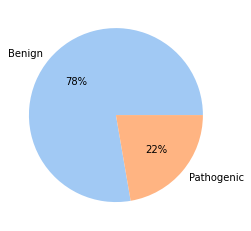

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = clin2['Effect'].value_counts()
labels = ['Benign', 'Pathogenic']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

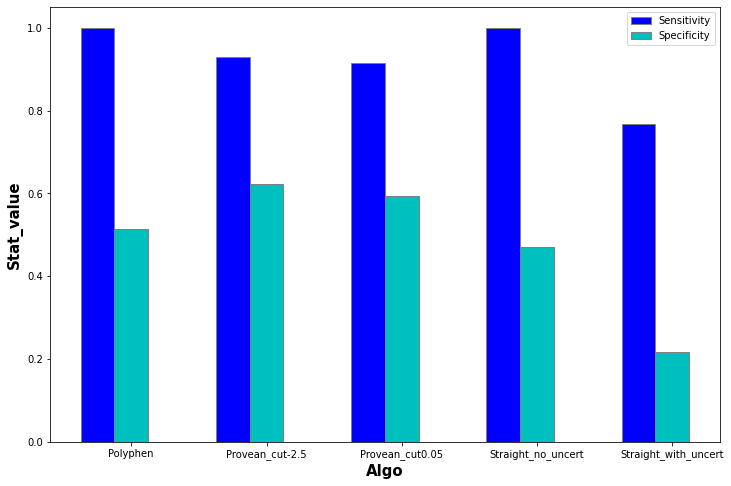

In [138]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Sensitivity = list(stats.Sensitivity)
Specificity = list(stats.Specificity)

 
# Set position of bar on X axis
br1 = np.arange(len(Sensitivity))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, Sensitivity, color ='b', width = barWidth,
        edgecolor ='grey', label ='Sensitivity')
plt.bar(br2, Specificity, color ='c', width = barWidth,
        edgecolor ='grey', label ='Specificity')

 
# Adding Xticks
plt.xlabel('Algo', fontweight ='bold', fontsize = 15)
plt.ylabel('Stat_value', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Sensitivity))],
        list(stats.Algo))
 
plt.legend()
plt.show()

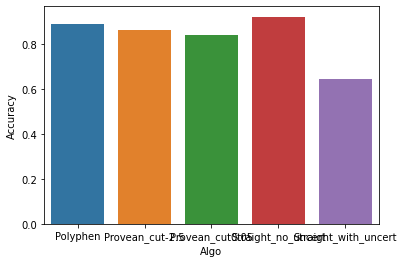

In [139]:
import seaborn as sns
ax = sns.barplot(x="Algo", y = 'Accuracy',data=stats)